# Case Study Six
## New Particle Detection - Neural Network

#### David Grijalva, Nicole Norelli, & Mingyang Nick YU
#### 11/12/2021

**Abstract**  
The following deliverable investigated and predicted the existance of a new particle. A dense neural network was the machine learning method used for classification. Multiple networks were trained, each with similar precision, recall, and F1 scores. Model 2, with four hidden layers and two drop-out layers, performed best overall; however, it had the longest training time. Model 1, with two hidden layers, had the quickest training with results that were nearly as accurate. Ultimate model choice will depend on the client's priorities.

## 1. Introduction  

This case study focused on predicting the existance of a new particle. The dataset had 7,000,000 instances with 29 features, including the target variable. The target variable indicated if the instance was a new particle or not, and all other features were numeric. The data was balanced in terms of the target variable, and there was no missing data.   

Neural Networks are supervised machine learning models composed of multiple layers. The inspiration for neural networks came from the basic understanding of how a human brain works. A brain is composed of neurons, which receive signals from multiple sources. Once the combined signals meet a certain threshold, the neuron fires an electrical impulse, which is transmitted to the subsequent neurons to which it is connected.  

In a neural network, perceptrons (or neurons) are designed to perform this function. Neural networks are comprised of multiple layers of neurons. The layers between the input and the output are called hidden layers. A number of neurons for each layer in the network is designated. In the first hidden layer, each neuron receives all of the input variables and calculates a regression with different weights ($w$) assigned to each variable ($x$). A bias term ($b$) is added, and the result of the regression equation is passed through an activation function (${\sigma}$).  

<center>$z = {\sigma}(w_i x_i + b)$<center>
<br>  

The activation function is chosen by the user, but is typically nonlinear, such as a sigmoid or Rectified Linear Unit (ReLU). This function performs the threshold activation one would see in a biological cell and adds nonlinearity to the model. The initial values for weights and bias terms are randomly assigned from a distribution which can be specified.  

The outputs from the first hidden layer are then passed as inputs to the next hidden layer, and the process repeats. In a dense neural network, all the neurons in each layer are connected to all the neurons in the previous and subsequent layers. The final output layer matches the target, with one output for a regression target, one or two outputs for a binary classification, or the appropriate number of outputs for a multi-class classification.  

A neural network is "trained" using an optimizer and a loss function. An appropriate loss function is chosen, depending on the type of problem. Typical loss functions include "BinaryCrossentropy", "SparseCategoricalCrossentropy", and "MeanSquaredError." An optimizer is also selected. Historically, stochastic gradient descent was often used as the default optimizer, but it is currently a slower choice. More modern optimizers include "adam" and "RMSprop." The loss is calculated, and the optimizer updates the weights of the neural network accordingly during the "backwards pass." This is the time-consuming portion of the training, with forward passes being relatively quick to provide predictions.  

Because neural networks are typically used with large data sets, data is broken down into batches. Batch size (the number of points in the network at one time) is specified, as well as the number of epochs (number of passes through the entire data set). Early stopping criteria can also be established. This monitors the loss, and a "patience" threshold is set. If the loss value increases for more successive epochs than the specified patience value, early stopping is reached. The early stopping criteria helps to avoid overfitting the data. 
    
An additional method to prevent overfitting and provide regularization to neural networks is the use of drop-out layers (<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout">Tensorflow documentation</a>). Using this method, a certain proportion of inputs are randomly set to zero at each specified step, and the inputs that were not set to zero are scaled up by 1/(1-rate) so the sum of all inputs stays the same.

## 2. Methods

### Data Preprocessing

In this case study, all features were used for modeling. The data was split between the train and test set using the train_test_split() function. The selected split was 90-10 for train and test datasets respectively. In order to ensure a fair distribution of targets between the two datasets the stratify parameter was set within the train_test_split() function. For models 1, 2, and 3 both the train and test data were scaled using the MinMaxScaler() function. This function transforms each numerical feature by scaling each value to a given range. In this instance, the default range of (0,1) was used. 

### Model 1

An initial four-layer deep neural network was built. The layers included an input layer with an input shape of 28 (one for each feature in the dataset), two hidden layers, with 100 neurons each using relu as the activation function, and one output layer with one neuron and sigmoid as the activation function. 
For the loss function, the "binary_crossentropy" was used, with an Adam optimizer with the Keras default learning rate. In order to prevent unnecessary training, early stopping was implemented as part of the learning process. A patience of 15 was implemented, meaning that if the validation loss has not improved on the last 15 rounds the model will stop any further training. The model was set to train on 1000 epochs with batches of 100,000 documents at a time. The early stopping logic stopped model training at Epoch 645.  


### Hyperparameter selection

This model was created using a pipeline. A pipeline allowed for streamlining of the scaling of numeric variables using MinMaxScaler() and tuning the hyperparameters of the sequential neural network. Pipelines prevent data leakage when using grid search with cross-validation in order to narrow down the best parameters. To ensure balanced outcome classes, stratified cross-validation was used. A random state was also set for reproducibility.

As for the deep neural network architecture, a 5 layer deep network was built. The layers included an input layer with an input shape of 28 (one for each feature in the dataset), three hidden layers, with 100, 150, 100 neurons respectively each using relu as activation functions, and an output layer with one neuron using sigmoid as the activation function. For the loss function, the "binary_crossentropy" was used, with an Adam optimizer and accuracy for metric. The model was set to train on 700 epochs with batches of 10,000 documents at a time.   

In order to use a Keras model with the Sckit API, the network was wrapped with the <b>.scikit_learn.KerasClassifier</b>  function provided by the Keras API. This allows for compatibility between the two APIs allowing for training of the neural network using the GridSearchCV function. 

A pipeline was created under the variable 'pipeline' to tune the kernel initializer parameter and the values for the learning rate. Values included ['glorot_uniform','GlorotNormal',  'RandomNormal'] for the kernel initializer and values of [1e-2, 1e-3] for the learning rate. Six combinations of these parameter values were attempted using GridSearchCV() in order to tune hyperparameters in an exhaustive manner. Tuning was conducted on the training data and stratified, shuffled 3-fold cross-validation was used. Training time for the six combinations was 17 hours and 38 minutes. The best combination used a  kernel initializer of "RandomNormal" and a learning rate of 0.001.

A downside of using the Sckit wrapper is that early stopping can not be implemented, thus this model was trained on all 700 epochs. 


### Model 2

Using the best parameters selected by the grid search model, an eight-layer deep neural network was built. The layers included an input layer with an input shape of 28 (one for each feature in the dataset),  four hidden layers,  with 100, 250, 100, 150 neurons respectively, all using relu as the activation function and a RandomNormal function used for kernel initializer. Finally, there were two drop-out layers with a drop of 0.2, and one output layer with one neuron using sigmoid as the activation function. The model was set to train on 1000 epochs with batches of 100,000 documents at a time. The early stopping logic stopped model training at Epoch 632. 

For the loss function, the "binary_crossentropy" was used, with an Adam optimizer with a learning rate of 0.001. In order to prevent unnecessary training, early stopping was implemented as part of the learning process. A patience to 25 was set, meaning that if the validation loss has not improved on the last 25 rounds the model will stop any further training. 




### Model 3

Model 3 was similar to Model 2 with a slight change in early stopping patience from 25 to 15. Using the best parameters selected by the grid search model, an eight-layer deep neural network was built. The layers included an input layer with an input shape of 28 (one for each feature in the dataset),  four hidden layers,  with 100, 250, 100, 150 neurons respectively, all using relu as the activation function and a RandomNormal function used for kernel initializer. Finally, there were two drop-out layers with a drop of 0.2, and one output layer with one neuron using sigmoid as the activation function.

For the loss function, the "binary_crossentropy" was used, with an Adam optimizer with a learning rate of 0.001. In order to prevent unnecessary training, early stopping was implemented as part of the learning process. A patience to 15 was set, meaning that if the validation loss has not improved on the last 15 rounds the model will stop any further training. 


## 3. Results  

Table 1 shows a comparison between the three different Neural Network Models attempted. It can be observed that Model2 has generated the best overall accuracy on the test set (unseen data by the network), and Model1 and Model3 with two and four hidden layers respectively generated the same overall accuracy. 

|Model | Model Description | Test Accuracy | 
|---|---|---|
|Model1| Two Hidden Layers with patience = 15 | 0.88 |
|Model2| Four Hidden Layers with patience = 25 | 0.89 |
|Model3| Four Hidden Layers with patience = 15 | 0.88 |

<div align="center"> Table 1: Overall performance for each model </div> 
<br>

Precision for a class means among all the instances predicted by the model to be that class, how many are actually that class. Recall for a class means among all the instances that are in that class, how many can the model predict to be that class. Using the Model2 as an example, precision for Non-Detection was 0.90, which means among all the particles that were predicted to be Non-Detection, 90% of them are actually Non-Detection. Recall for Non-Detection was 0.87, which means among all the particles that are actually Non-Detection, the model identified 87% of them. Precision and recall for each class under each model are also demonstrated in Table 2.

|Model | Non-Detection Precision | Non-Detection Recall | Non-Detection F1 | Detection Precision | Detection Recall | Detection F1 | 
|---|---|---|---|---|---|---|
|Model1| 0.89 | 0.87 |   0.88 |  0.87|  0.89 |  0.88 | 
|Model2| 0.90  | 0.87 |  0.88 |  0.87 |  0.91 |  0.89 | 
|Model3| 0.89  | 0.87 |  0.88 |  0.87 |  0.90 |  0.89 | 

<div align="center"> Table 2: Performance by class for each model </div> 
<br>

The confusion matrices for each model are displayed for Model1 (Fig. 1), Model2 (Fig. 2), and Model3 (Fig. 3). It can be seen that Model1 and Model3 are able to detect more particles in the Non-Detection category, while Model2 sacrifices the ability to predict Non-Detection particles by a small amount but was able to predict thousands of more Detection particles accurately when compared to Model1 and Model3.


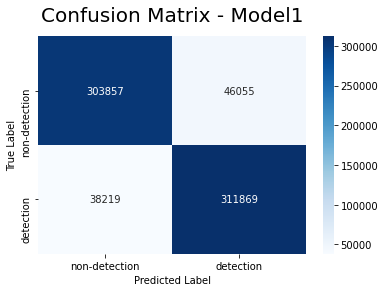

In [52]:
get_confusion_matrix(y_test, predictions, mat_title='Confusion Matrix - Model1')

<div align="center"> Figure 1: Model1 Confusion Matrix </div> 

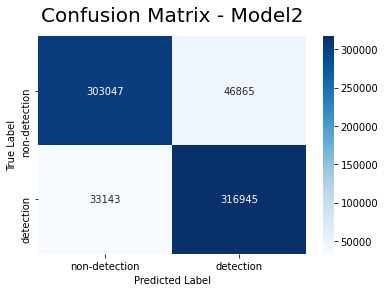

In [49]:
get_confusion_matrix(y_test, predictions, mat_title='Confusion Matrix - Model2')

<div align="center"> Figure 2: Model2 Confusion Matrix </div> 

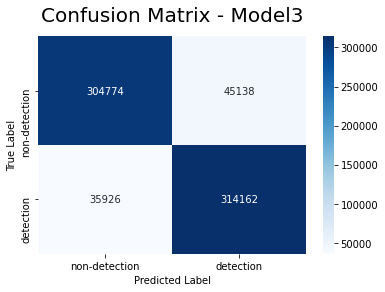

In [46]:
get_confusion_matrix(y_test, predictions, mat_title='Confusion Matrix - Model3')

<div align="center"> Figure 3: Model3 Confusion Matrix </div> 

## 4. Conclusion  

Based on the results shown, all three models are doing decent jobs in prediction accuracy. Depending on the client's scientific requirements, if detection of particles is of the most importance, Model2 would be preferred. Because all three models generated decent prediction accuracy, it can be helpful to compare training time as well (Table 3). As can be seen Model2 took the most time compared to Model3 with the early stopping patience set to 25 instead of 15. Model3 took almost three-fold the amount of time compared to Model1 because it incorporates two more hidden layers, more neurons in the additional two layers, and two dropout layers in the neural network. 

|Model | Training time| Number of Epochs|
|---|---|---|
|Model1| 50min 37s| 645| 
|Model2| 5h 8min 25s | 632  | 
|Model3| 2h 20min 31s | 305  | 


<div align="center"> Table 3: Training Time and Number of Epochs </div> 
<br>

It is worth mentioning the cut-off for predictions of Non-Detection and Detection particles can be adjusted to allow for the identification of more true positives at the cost of less true negatives, if so desired. The final model to be deployed should be retrained on the entire dataset once clients agree with the current estimated performance.

## Appendix - Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle
import joblib


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import os
cwd = os.getcwd()
d = os.path.dirname(cwd)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

pd.options.display.max_rows = 99999
pd.options.display.max_columns = 99999

In [12]:
# %%time

# chunk = pd.read_csv('all_train.csv.gz',compression='gzip',
# #                     iterator=True, chunksize=200000)

#data = pd.read_csv('all_train.csv.gz',compression='gzip')

CPU times: user 1min 9s, sys: 4.67 s, total: 1min 13s
Wall time: 1min 15s


In [13]:
# %time data.to_pickle("data.pkl")

CPU times: user 1.06 ms, sys: 2.16 s, total: 2.16 s
Wall time: 3.21 s


In [2]:
%time data = pd.read_pickle("data.pkl")

CPU times: user 1.66 ms, sys: 738 ms, total: 740 ms
Wall time: 744 ms


In [5]:
# data = next(chunk)

In [3]:
data.shape

(7000000, 29)

In [4]:
# Convert Target label to Int
data['# label'] = data['# label'].astype(int)

In [5]:
data['# label'].value_counts()

1    3500879
0    3499121
Name: # label, dtype: int64

In [6]:
data.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,0.754261,2.269852,-1.300984,-1.199420,-1.161915,3.357043,0.460796,-0.404118,-0.815440,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,0.754261,0.459217,-0.695640,0.359856,-1.161915,-0.502048,0.505149,-1.500441,1.226331,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,0.754261,-1.031239,1.912465,-1.321417,-1.161915,-0.406757,1.346497,-0.298099,1.226331,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,0.754261,1.142262,0.551081,1.016731,0.860649,0.454005,0.624624,1.439072,-0.815440,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,-1.325801,-0.181512,-1.329374,0.879087,0.860649,-0.143564,-1.293935,-1.222800,-0.815440,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [7]:
X, y = data.drop('# label', axis = 1), data['# label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=43, stratify=y)


In [9]:
X.shape

(7000000, 28)

#### Helper Function

In [10]:

def get_confusion_matrix(y, yhat,mat_title="Confusion Matrix"):
    x_axis_labels = ['non-detection','detection']
    y_axis_labels = ['non-detection','detection']
    cm_n = confusion_matrix(y, yhat)
    ax = sns.heatmap(cm_n,cmap='Blues',annot=True,fmt='2d',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set(xlabel='Predicted Label', ylabel='True Label')
    ax.set_title(mat_title,fontdict={'fontsize':20},pad=15)

def get_classification_report(x_train, y_train, x_test, y_test, pred, model):
    """
    This function is used to get comprehensive classification report for binary response:
    Training Accuracy, Test Accuracy, print classification_report, plot confusion matrix.
    """
    print("Classification Report:")
    print(classification_report(y_test,pred))
    get_confusion_matrix(y_test,pred)


### Model1: build initial NN model - patience = 15

In [11]:
# Scale Train/Test Data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Build Sequential NN model using Tensorflow and Keras
model = Sequential()
model.add(InputLayer(input_shape=(28,)))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)




In [17]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          batch_size=100000,
          epochs=1000,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/1000
63/63 [==============================] - 5s 77ms/step - loss: 0.5229 - val_loss: 0.3895
Epoch 2/1000
63/63 [==============================] - 5s 75ms/step - loss: 0.3688 - val_loss: 0.3548
Epoch 3/1000
63/63 [==============================] - 5s 74ms/step - loss: 0.3442 - val_loss: 0.3334
Epoch 4/1000
63/63 [==============================] - 5s 75ms/step - loss: 0.3279 - val_loss: 0.3231
Epoch 5/1000
63/63 [==============================] - 5s 76ms/step - loss: 0.3202 - val_loss: 0.3174
Epoch 6/1000
63/63 [==============================] - 5s 76ms/step - loss: 0.3158 - val_loss: 0.3136
Epoch 7/1000
63/63 [==============================] - 5s 76ms/step - loss: 0.3125 - val_loss: 0.3116
Epoch 8/1000
63/63 [==============================] - 5s 76ms/step - loss: 0.3102 - val_loss: 0.3086
Epoch 9/1000
63/63 [==============================] - 5s 76ms/step - loss: 0.3079 - val_loss: 0.3066
Epoch 10/1000
63/63 [==============================] - 5s 75ms/step - loss: 0.3059 - val_lo

In [18]:
model_loss = pd.DataFrame(model.history.history)

In [31]:
def plot_early_stop_rounds(model_loss):
    plt.subplots(figsize=(10,6))
    plt.plot(model_loss['loss'],lw=2.5, label='train')
    plt.plot(model_loss['val_loss'],lw=2.5, label = 'test')
    plt.title('Train/Test Loss vs. Epochs',fontdict={'fontsize':20},pad=15)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

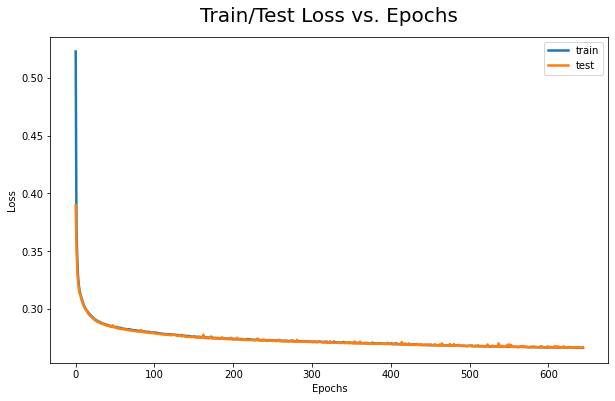

In [23]:

plot_early_stop_rounds(model_loss)

In [19]:
# Saving Train/Test loss history
file_name_model_history = "train_test_history.sav"
#joblib.dump(model_loss, file_name_model_history)
model_loss = joblib.load(file_name_model_history)

['train_test_history.sav']

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88    349912
           1       0.87      0.89      0.88    350088

    accuracy                           0.88    700000
   macro avg       0.88      0.88      0.88    700000
weighted avg       0.88      0.88      0.88    700000



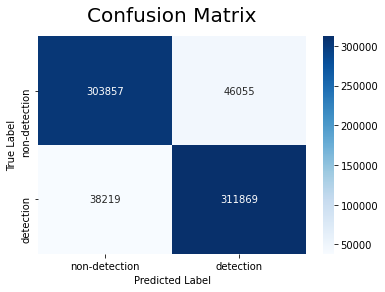

In [51]:
predictions = (model.predict(X_test)>0.5).astype("int32")
get_classification_report(X_train,y_train,X_test,y_test,predictions,model)

In [50]:
path = cwd+"/keras_model"
# model.save(path)
model = keras.models.load_model(path)


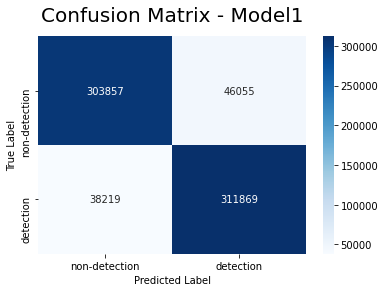

In [52]:
get_confusion_matrix(y_test, predictions, mat_title='Confusion Matrix - Model1')

#### Model using scikit learn wrapper for CV and grid search

In [13]:
def build_model(init='glorot_uniform',learning_rate=0.01):
    model = Sequential()
    model.add(InputLayer(input_shape=(28,)))
    model.add(Dense(units=100, kernel_initializer=init, activation='relu'))
    model.add(Dense(units=150, kernel_initializer=init, activation='relu'))
    model.add(Dense(units=100, kernel_initializer=init, activation='relu'))
    #model.add(Dense(units=150, kernel_initializer=init, activation='relu'))
    model.add(Dense(units=1, kernel_initializer=init, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model 

model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, verbose=0, 
                                                       epochs=700, batch_size=10000)

In [14]:
%time data = pd.read_pickle("data.pkl")
X, y = data.drop('# label', axis = 1), data['# label']

CPU times: user 1.3 ms, sys: 687 ms, total: 688 ms
Wall time: 688 ms


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 28 columns):
 #   Column  Dtype  
---  ------  -----  
 0   f0      float64
 1   f1      float64
 2   f2      float64
 3   f3      float64
 4   f4      float64
 5   f5      float64
 6   f6      float64
 7   f7      float64
 8   f8      float64
 9   f9      float64
 10  f10     float64
 11  f11     float64
 12  f12     float64
 13  f13     float64
 14  f14     float64
 15  f15     float64
 16  f16     float64
 17  f17     float64
 18  f18     float64
 19  f19     float64
 20  f20     float64
 21  f21     float64
 22  f22     float64
 23  f23     float64
 24  f24     float64
 25  f25     float64
 26  f26     float64
 27  mass    float64
dtypes: float64(28)
memory usage: 1.5 GB


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, 
                                                    shuffle=True, random_state=43, stratify=y)


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300000 entries, 6011971 to 5247539
Data columns (total 28 columns):
 #   Column  Dtype  
---  ------  -----  
 0   f0      float64
 1   f1      float64
 2   f2      float64
 3   f3      float64
 4   f4      float64
 5   f5      float64
 6   f6      float64
 7   f7      float64
 8   f8      float64
 9   f9      float64
 10  f10     float64
 11  f11     float64
 12  f12     float64
 13  f13     float64
 14  f14     float64
 15  f15     float64
 16  f16     float64
 17  f17     float64
 18  f18     float64
 19  f19     float64
 20  f20     float64
 21  f21     float64
 22  f22     float64
 23  f23     float64
 24  f24     float64
 25  f25     float64
 26  f26     float64
 27  mass    float64
dtypes: float64(28)
memory usage: 1.4 GB


#### Cant get validation loss this way

In [10]:
%%time

param_grid = {"model__init": ['glorot_uniform','GlorotNormal',  'RandomNormal'],
             "model__learning_rate": [1e-2, 1e-3]}

#param_grid = {}

t = [ ('scale', MinMaxScaler(), X_train.columns)]
col_transform = ColumnTransformer(t)

pipeline = Pipeline(steps=[('preprocessing',col_transform), ('model', model)])


grid = GridSearchCV(estimator=pipeline, 
                    param_grid=param_grid,
                    cv=3, return_train_score=True, n_jobs=2)

grid_result = grid.fit(X_train, y_train)

CPU times: user 10h 22min 34s, sys: 3h 40min 54s, total: 14h 3min 29s
Wall time: 17h 38min 41s


In [11]:
pd.DataFrame(grid_result.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__init,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6027.621429,194.815690,4.328607,0.824115,glorot_uniform,0.01,"{'model__init': 'glorot_uniform', 'model__lear...",0.882840,0.883082,0.884309,0.883410,0.000643,6,0.884093,0.884671,0.886261,0.885008,0.000916
1,6410.732521,71.128820,3.219965,0.382342,glorot_uniform,0.001,"{'model__init': 'glorot_uniform', 'model__lear...",0.883368,0.883458,0.883592,0.883473,0.000092,5,0.888923,0.888934,0.888800,0.888886,0.000061
2,6341.728846,50.100547,4.093840,0.679503,GlorotNormal,0.01,"{'model__init': 'GlorotNormal', 'model__learni...",0.883249,0.883822,0.883411,0.883494,0.000241,4,0.884683,0.886076,0.885340,0.885366,0.000569
3,6504.153765,64.581004,4.833134,0.636566,GlorotNormal,0.001,"{'model__init': 'GlorotNormal', 'model__learni...",0.884012,0.882870,0.884067,0.883650,0.000552,2,0.888988,0.888141,0.888354,0.888494,0.000359
4,6432.528417,128.263358,4.266785,0.620309,RandomNormal,0.01,"{'model__init': 'RandomNormal', 'model__learni...",0.883568,0.883504,0.883503,0.883525,0.000030,3,0.885652,0.885711,0.885495,0.885619,0.000091
5,6716.336992,75.611779,4.329533,0.749331,RandomNormal,0.001,"{'model__init': 'RandomNormal', 'model__learni...",0.884066,0.883973,0.883480,0.883840,0.000257,1,0.888349,0.888771,0.888020,0.888380,0.000307


In [12]:
grid_result.best_params_

{'model__init': 'RandomNormal', 'model__learning_rate': 0.001}

In [76]:
# path = cwd+"/keras_model_cv"
# model.save(path)
# model_cv = keras.models.load_model(path)


# save model
file_name_keras_nn = f"{cwd}/keras_model_cv.h5"
#grid_result.best_estimator_.named_steps["model"].model.save(file_name_keras_nn)


# save pipeline
file_name_keras_nn_pipeline = f"{cwd}/keras_model_cv.sav"
grid_result.best_estimator_.named_steps["model"].model = None
joblib.dump(grid_result.best_estimator_, file_name_keras_nn_pipeline)





['/Users/dgrijalva/SMU/Fall2021/qtw/casestudy6/keras_model_cv.sav']

In [18]:
from keras.models import load_model
file_name_keras_nn = f"{cwd}/keras_model_cv.h5"
file_name_keras_nn_pipeline = f"{cwd}/keras_model_cv.sav"
# load pipeline
nn_pipeline = joblib.load(file_name_keras_nn_pipeline)
# load model
nn_pipeline.named_steps['model'].model = load_model(file_name_keras_nn)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89    349912
         1.0       0.88      0.90      0.89    350088

    accuracy                           0.89    700000
   macro avg       0.89      0.89      0.89    700000
weighted avg       0.89      0.89      0.89    700000



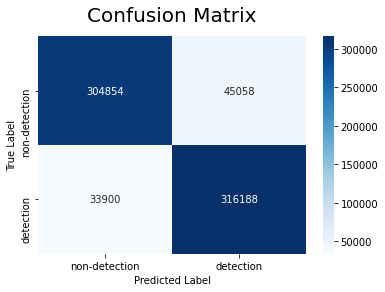

In [26]:
predictions = (nn_pipeline.predict(X_test)>0.5).astype("int32")
get_classification_report(X_train,y_train,X_test,y_test,predictions,nn_pipeline)

### Model2: Using best kernel_initializer and learning_rate - patience = 25

In [67]:
%time data = pd.read_pickle("data.pkl")
X, y = data.drop('# label', axis = 1), data['# label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, 
                                                    shuffle=True, random_state=43, stratify=y)



# Scale Train/Test Data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

CPU times: user 2.1 ms, sys: 1.39 s, total: 1.39 s
Wall time: 2.27 s


In [65]:
model = Sequential()
model.add(InputLayer(input_shape=(28,)))
model.add(Dense(units=100, kernel_initializer="RandomNormal", activation='relu'))
model.add(Dense(units=250, kernel_initializer="RandomNormal", activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer="RandomNormal", activation='relu'))
model.add(Dense(units=150, kernel_initializer="RandomNormal", activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, kernel_initializer="RandomNormal", activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy', tf.keras.metrics.AUC()])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=25)




In [68]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          batch_size=100000,
          epochs=1000,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/1000
63/63 - 36s - loss: 0.3025 - accuracy: 0.8574 - auc_1: 0.9418 - val_loss: 0.3020 - val_accuracy: 0.8571 - val_auc_1: 0.9428
Epoch 2/1000
63/63 - 36s - loss: 0.3004 - accuracy: 0.8585 - auc_1: 0.9426 - val_loss: 0.3016 - val_accuracy: 0.8584 - val_auc_1: 0.9430
Epoch 3/1000
63/63 - 34s - loss: 0.2990 - accuracy: 0.8593 - auc_1: 0.9431 - val_loss: 0.2965 - val_accuracy: 0.8606 - val_auc_1: 0.9442
Epoch 4/1000
63/63 - 38s - loss: 0.2974 - accuracy: 0.8602 - auc_1: 0.9438 - val_loss: 0.2952 - val_accuracy: 0.8615 - val_auc_1: 0.9447
Epoch 5/1000
63/63 - 32s - loss: 0.2961 - accuracy: 0.8610 - auc_1: 0.9443 - val_loss: 0.2940 - val_accuracy: 0.8624 - val_auc_1: 0.9451
Epoch 6/1000
63/63 - 31s - loss: 0.2944 - accuracy: 0.8621 - auc_1: 0.9450 - val_loss: 0.2934 - val_accuracy: 0.8630 - val_auc_1: 0.9457
Epoch 7/1000
63/63 - 31s - loss: 0.2943 - accuracy: 0.8623 - auc_1: 0.9450 - val_loss: 0.2943 - val_accuracy: 0.8625 - val_auc_1: 0.9458
Epoch 8/1000
63/63 - 33s - loss: 0.2933 -

In [69]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 100)               2900      
_________________________________________________________________
dense_42 (Dense)             (None, 250)               25250     
_________________________________________________________________
dense_43 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_44 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 151       
Total params: 68,551
Trainable params: 68,551
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_loss = pd.DataFrame(model.history.history)

In [71]:
# Saving Train/Test loss history
file_name_model_history = "train_test_history_v2.sav"
#joblib.dump(model_loss, file_name_model_history)
model_loss = joblib.load(file_name_model_history)

In [47]:
path = cwd+"/keras_model_v2"
# model.save(path)
model = keras.models.load_model(path)


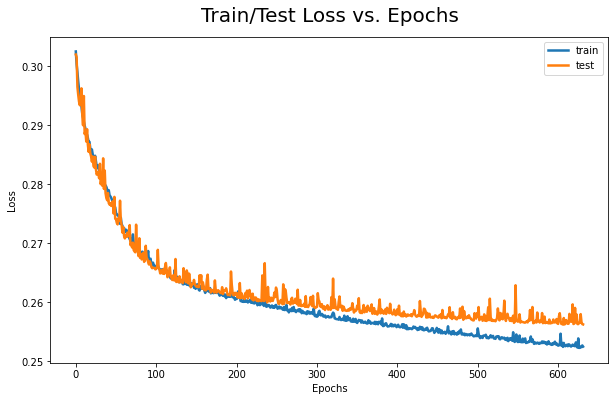

In [73]:
plot_early_stop_rounds(model_loss)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88    349912
           1       0.87      0.91      0.89    350088

    accuracy                           0.89    700000
   macro avg       0.89      0.89      0.89    700000
weighted avg       0.89      0.89      0.89    700000



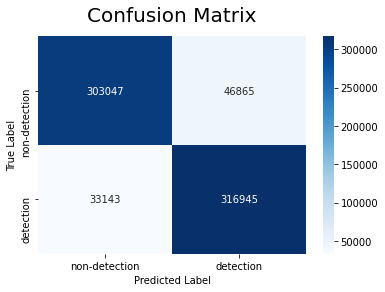

In [48]:
predictions = (model.predict(X_test)>0.5).astype("int32")
get_classification_report(X_train,y_train,X_test,y_test,predictions, model)

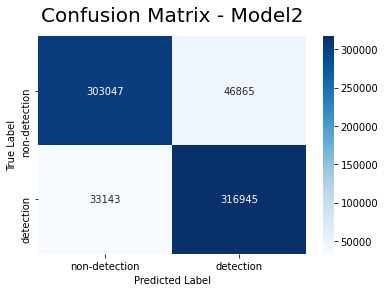

In [49]:
get_confusion_matrix(y_test, predictions, mat_title='Confusion Matrix - Model2')

### Model3: Using best kernel_initializer and learning_rate - patience = 15

In [37]:
%time data = pd.read_pickle("data.pkl")
# Convert Target label to Int
data['# label'] = data['# label'].astype(int)
X, y = data.drop('# label', axis = 1), data['# label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, 
                                                    shuffle=True, random_state=43, stratify=y)



# Scale Train/Test Data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

CPU times: user 1.35 ms, sys: 685 ms, total: 687 ms
Wall time: 686 ms


In [38]:
model = Sequential()
model.add(InputLayer(input_shape=(28,)))
model.add(Dense(units=100, kernel_initializer="RandomNormal", activation='relu'))
model.add(Dense(units=250, kernel_initializer="RandomNormal", activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer="RandomNormal", activation='relu'))
model.add(Dense(units=150, kernel_initializer="RandomNormal", activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, kernel_initializer="RandomNormal", activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy', tf.keras.metrics.AUC()])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)




In [39]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          batch_size=100000,
          epochs=1000,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/1000
63/63 - 29s - loss: 0.4962 - accuracy: 0.7729 - auc: 0.8461 - val_loss: 0.3774 - val_accuracy: 0.8289 - val_auc: 0.9110
Epoch 2/1000
63/63 - 27s - loss: 0.3664 - accuracy: 0.8308 - auc: 0.9156 - val_loss: 0.3449 - val_accuracy: 0.8357 - val_auc: 0.9255
Epoch 3/1000
63/63 - 27s - loss: 0.3361 - accuracy: 0.8383 - auc: 0.9280 - val_loss: 0.3218 - val_accuracy: 0.8461 - val_auc: 0.9337
Epoch 4/1000
63/63 - 27s - loss: 0.3236 - accuracy: 0.8458 - auc: 0.9332 - val_loss: 0.3145 - val_accuracy: 0.8513 - val_auc: 0.9372
Epoch 5/1000
63/63 - 27s - loss: 0.3167 - accuracy: 0.8503 - auc: 0.9362 - val_loss: 0.3084 - val_accuracy: 0.8552 - val_auc: 0.9398
Epoch 6/1000
63/63 - 27s - loss: 0.3117 - accuracy: 0.8533 - auc: 0.9383 - val_loss: 0.3059 - val_accuracy: 0.8560 - val_auc: 0.9412
Epoch 7/1000
63/63 - 27s - loss: 0.3075 - accuracy: 0.8555 - auc: 0.9400 - val_loss: 0.3038 - val_accuracy: 0.8579 - val_auc: 0.9426
Epoch 8/1000
63/63 - 27s - loss: 0.3042 - accuracy: 0.8571 - auc: 0.9

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2900      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               25250     
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               15150     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1

In [41]:
model_loss = pd.DataFrame(model.history.history)

In [42]:
# Saving Train/Test loss history
file_name_model_history = "train_test_history_v3.sav"
# joblib.dump(model_loss, file_name_model_history)
model_loss = joblib.load(file_name_model_history)

['train_test_history_v3.sav']

In [43]:
path = cwd+"/keras_model_v3"
# model.save(path)
model = keras.models.load_model(path)


INFO:tensorflow:Assets written to: /Users/mingyang/Desktop/SMU/QTW/casestudy6/keras_model_v3/assets


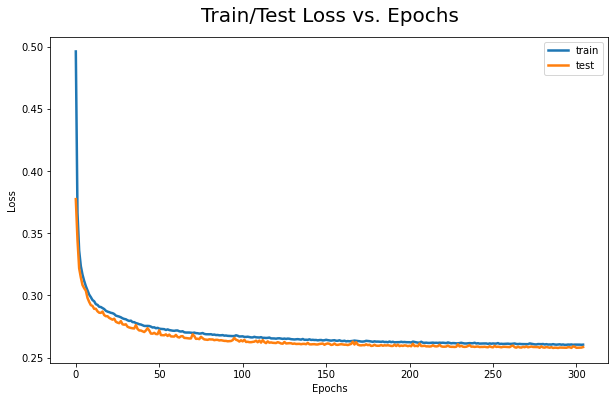

In [44]:
plot_early_stop_rounds(model_loss)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88    349912
           1       0.87      0.90      0.89    350088

    accuracy                           0.88    700000
   macro avg       0.88      0.88      0.88    700000
weighted avg       0.88      0.88      0.88    700000



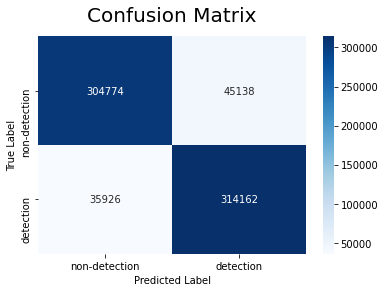

In [45]:
predictions = (model.predict(X_test)>0.5).astype("int32")
get_classification_report(X_train,y_train,X_test,y_test,predictions, model)

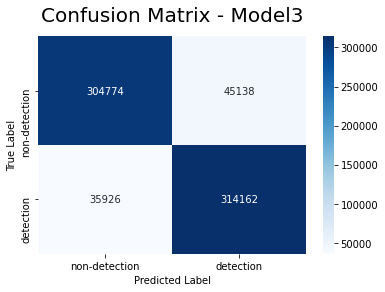

In [46]:
get_confusion_matrix(y_test, predictions, mat_title='Confusion Matrix - Model3')